Data Analysis Project Using Python - STUDENT PERFORMANCE 

IMPORTING NECESSARY LIBRARIES 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [3]:
df = pd.read_csv("student-mat.csv", delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


DATA EXPLORATION

In [37]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
df.shape

(395, 33)

DATA CLEANING

In [6]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [19]:
# Columns to fill missing values
columns_to_fill = ['failures', 'absences', 'G1', 'G2', 'G3']

# Replacing the missing values with the mean 
for column in columns_to_fill:
    if column in df.columns:
        df[column].fillna(df[column].mean(), inplace=True)  

# Saving the updated DataFrame to a valid path
output_path = 'student-mat-updated.csv'  # Saves to the current working directory

# Saving the DataFrame
df.to_csv(output_path, index=False)

print(f"File saved successfully to {output_path}")

File saved successfully to student-mat-updated.csv


In [20]:
df.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Average score in math (G3)

In [21]:
average_score = df['G3'].mean()
print(f"\nAverage Math Score (G3): {average_score:.2f}")


Average Math Score (G3): 10.42


Students scored above 15 in their final grade(G3)

In [22]:
students_above_15 = df[df['G3'] > 15].shape[0]
print(f"Number of students who scored above 15 in their final grade (G3): {students_above_15}")

Number of students who scored above 15 in their final grade (G3): 40


Correlation between study time (study time) and the final grade (G3)

In [23]:
correlation_studytime_g3 = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and final grade (G3): {correlation_studytime_g3:.3f}")

Correlation between study time and final grade (G3): 0.098


Gender which has a higher average final grade (G3)

In [24]:
average_g3_by_gender = df.groupby('sex')['G3'].mean()
print("Average final grade (G3) by gender:")
print(average_g3_by_gender)

Average final grade (G3) by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


DATA VISUALIZATION

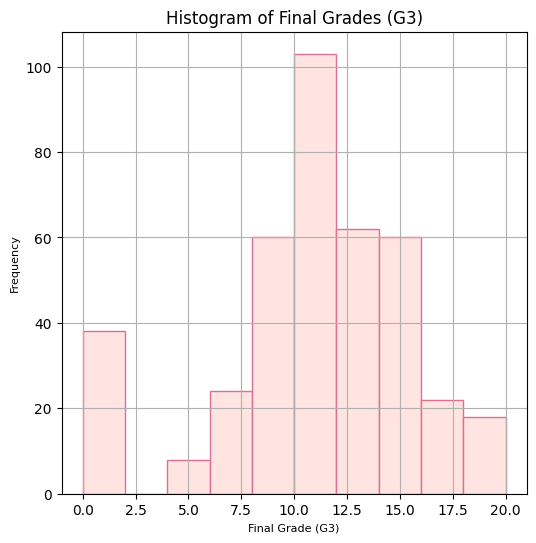

In [25]:
import matplotlib.pyplot as plt

# Plotting the histogram for final grades (G3)
plt.figure(figsize=(6, 6))
plt.hist(df['G3'], bins=10, color='mistyrose', edgecolor='palevioletred')
plt.title('Histogram of Final Grades (G3)', fontsize=12)
plt.xlabel('Final Grade (G3)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.grid(True)
plt.show()

Insights of the above visualization:

The majority of students have average to above-average performance.
Very few students score exceptionally high or exceptionally low grades.

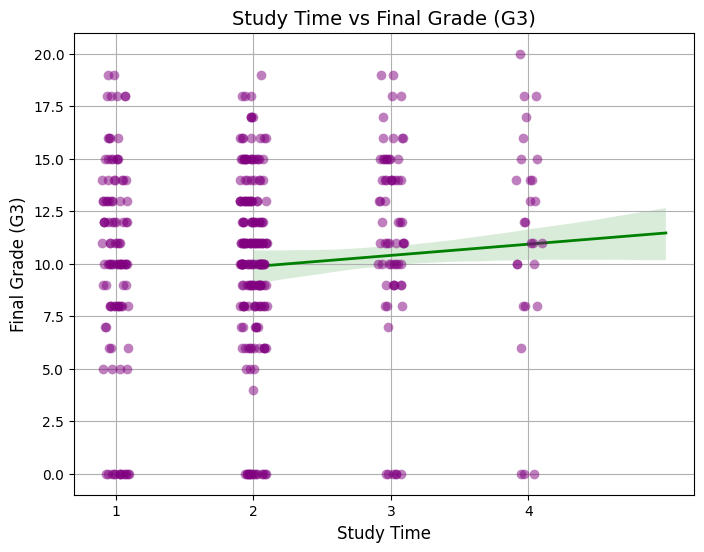

In [26]:
#scatter plot between study time (study time) and final grade (G3)
# Scatter plot with jitter and adjusted marker size, adding a regression line
plt.figure(figsize=(8, 6))

# Adding jitter by using stripplot and overlaying the scatter plot
sns.stripplot(x=df['studytime'], y=df['G3'], color='purple', jitter=True, alpha=0.5, size=7)

# Adding a regression line to see the relationship
sns.regplot(x=df['studytime'], y=df['G3'], scatter=False, color='blue', line_kws={'linewidth': 2, 'color': 'green'})

plt.title('Study Time vs Final Grade (G3)', fontsize=14)
plt.xlabel('Study Time', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(True)
plt.show()


Insights of the above visualization:
1. Impact of Study Time:
While higher study time (levels 3 and 4) is associated with slightly better grades, the relationship is not strong.
Some students with minimal study time (level 1 or 2) still achieve high grades, indicating individual differences in learning efficiency or other contributing factors.
2. Recommendation:
Increasing study time might improve grades to some extent, but other strategies like effective learning techniques and understanding concepts might also be necessary to maximize performance.

C:\Users\megha\AppData\Local\Temp\ipykernel_1448\2466031564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G3', data=avg_scores, palette='Set2')


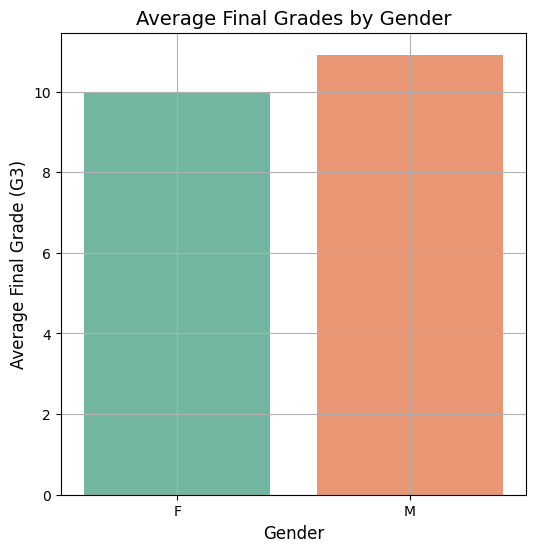

In [27]:
# Bar chart comparing the average scores of male and female students
# Grouping by gender and calculating the average final grade (G3)
avg_scores = df.groupby('sex')['G3'].mean().reset_index()

# Bar chart comparing average scores of male and female students
plt.figure(figsize=(6, 6))
sns.barplot(x='sex', y='G3', data=avg_scores, palette='Set2')
plt.title('Average Final Grades by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.grid(True)
plt.show()

Insights of the above visualization:
1. Male students have slightly higher average final grades than female students, but the difference is minor.
2. The gap suggests gender has minimal influence on performance.
3. Further analysis (e.g., statistical tests) could confirm if the difference is significant.